# Import non-imputed data for modeling

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd ../Desktop/Insight/2012_MEPS/

/Users/bstankev/Desktop/Insight/2012_MEPS


In [4]:
df = pd.read_csv('feat_new.csv')

In [5]:
df.shape

(38974, 69)

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,DUID_x,PID_x,DUPERSID,OBVTCH12,OBVEXP12,ERTTCH12,ERTEXP12,IPTTCH12,...,ADHDADDX,ANYLIM12,ADSMOK42,ADMALS42,ADMWLM42,ADPAIN42,ADCAPE42,ADNRGY42,ADDOWN42,ADSOCA42
0,0,0,20004,101,20004101,NaN,NaN,NaN,NaN,NaN,...,0,2,2,3,3,1,2,3,4,5
1,1,1,20004,102,20004102,NaN,NaN,NaN,NaN,NaN,...,0,2,2,3,5,1,3,3,4,5
2,2,2,20004,103,20004103,NaN,NaN,NaN,NaN,NaN,...,2,2,0,0,0,0,0,0,0,0
3,3,3,20005,101,20005101,1100,451,NaN,NaN,NaN,...,0,1,2,1,5,5,3,4,2,2
4,4,4,20005,102,20005102,490,127,NaN,NaN,NaN,...,0,2,2,5,5,1,1,1,5,5


# Create log(expenditure) columns for each expenditure type

In [7]:
df['OBVEXPlog'] = np.log(df['OBVEXP12'])
df['ERTEXPlog'] = np.log(df['ERTEXP12'])
df['HHAEXPlog'] = np.log(df['HHAEXP12'])
df['IPTEXPlog'] = np.log(df['IPTEXP12'])
df['RXEXPlog'] = np.log(df['RXEXP12'])
df['TOTEXPlog'] = np.log(df['TOTEXP12'])

In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,DUID_x,PID_x,DUPERSID,OBVTCH12,OBVEXP12,ERTTCH12,ERTEXP12,IPTTCH12,...,ADCAPE42,ADNRGY42,ADDOWN42,ADSOCA42,OBVEXPlog,ERTEXPlog,HHAEXPlog,IPTEXPlog,RXEXPlog,TOTEXPlog
0,0,0,20004,101,20004101,NaN,NaN,NaN,NaN,NaN,...,2,3,4,5,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,20004,102,20004102,NaN,NaN,NaN,NaN,NaN,...,3,3,4,5,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,20004,103,20004103,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4.317488
3,3,3,20005,101,20005101,1100,451,NaN,NaN,NaN,...,3,4,2,2,6.111467,NaN,NaN,NaN,5.68358,6.613384
4,4,4,20005,102,20005102,490,127,NaN,NaN,NaN,...,1,1,5,5,4.844187,NaN,NaN,NaN,NaN,4.844187


# Create Feature & class arrays for each expenditure type

Taking into account best features for each model

### Office based visits

In [9]:
obdf = df[np.isfinite(df['OBVEXP12'])]

obX = obdf[['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
            "STRKAGED",'MNHLTHSTAT',"DIABAGED",'AGELAST',
            "ADPAIN42","CHOLAGED", "ADCAPE42", 'EDRECODE',
            "ADNRGY42"]]
obX0 = obX.fillna(0)

obY = obdf['OBVEXPlog']

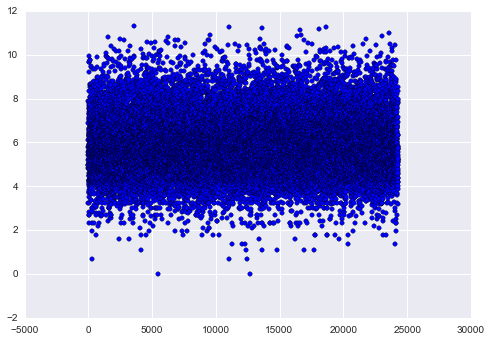

In [10]:
x = np.arange(len(obY))
plt.scatter(x,obY)

In [11]:
np.median(obdf['RXEXP12'])

784.0

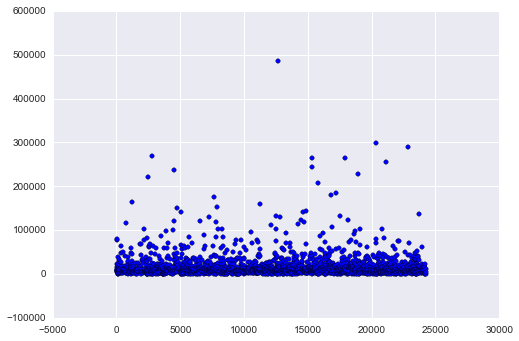

In [12]:
plt.scatter(x,obdf['IPTEXP12'])

In [13]:
obdf.shape

(24274, 75)

### ER Visits

In [14]:
erdf = df[np.isfinite(df['ERTEXP12'])]

erX = erdf[['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
            "STRKAGED",'MNHLTHSTAT',"DIABAGED",'AGELAST',
            "ADPAIN42","CHOLAGED", "ADCAPE42", 'EDRECODE',
            "ADNRGY42",'ACTDTY53','MARRY12X']]
erX0 = erX.fillna(0)

erY = erdf['ERTEXPlog']

In [15]:
erdf.shape

(4627, 75)

### Inpatient Visits

In [16]:
indf = df[np.isfinite(df['IPTEXP12'])]

inX = indf[['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
            "STRKAGED",'MNHLTHSTAT',"DIABAGED",'AGELAST',
            "ADPAIN42","CHOLAGED", "ADCAPE42", 'EDRECODE',
            "ADNRGY42",'HIDEG','SEX','ANYLIM12', 'HISPCAT']]
inX0 = inX.fillna(0)

inY = indf['IPTEXPlog']

In [17]:
indf.shape

(2361, 75)

### Home Health

In [18]:
hhdf = df[np.isfinite(df['HHAEXP12'])]

hhX = hhdf[['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
            "STRKAGED",'MNHLTHSTAT',"DIABAGED",'AGELAST',
            "CHOLAGED", "ADCAPE42", 'EDRECODE',"ADNRGY42",
            'MARRY12X', 'RACEV1X']]
hhX0 = hhX.fillna(0)

hhY = hhdf['HHAEXPlog']

### RX 

In [19]:
rxdf = df[np.isfinite(df['RXEXP12'])]

rxX = rxdf[['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
            "STRKAGED",'MNHLTHSTAT',"DIABAGED",'AGELAST',
            "CHOLAGED", 'EDRECODE',"ADNRGY42",'ANYLIM12', 
            'ADHDAGED','HIDEG','ADPAIN42','RACEV1X']]
rxX0 = rxX.fillna(0)

rxY = rxdf['RXEXPlog']

In [20]:
rxdf.shape

(20376, 75)

### Total

In [22]:
totdf = df[np.isfinite(df['TOTEXP12'])]

totX = totdf[['MNHLTHSTAT','HLTHSTAT', 'SEX', 'AGELAST',
            'POVLEV12','HIDEG','EDRECODE',"HIBPAGED", 
             "STRKAGED","CHOLAGED", "DIABAGED", "JTPAIN31",
            "BMINDX53","ADMALS42", "ADMWLM42","ADPAIN42",  
            "ADNRGY42"]]
totX0 = totX.fillna(0)

totY = totdf['TOTEXPlog']

In [23]:
totdf.shape

(29807, 75)

In [24]:
# bank of column labels
#df[['MNHLTHSTAT','HLTHSTAT','RACEV1X', 'SEX', 'AGELAST',
#            'POVCAT12','POVLEV12','HISPANX','HISPCAT',
#            'HIDEG', 
#            'EDRECODE','FTSTU12X','HONRDC53',
#           "HIBPDX","HIBPAGED", "STRKDX", "STRKAGED","CHOLDX", 
#          "CHOLAGED", "CANCERDX","DIABDX", "DIABAGED", "JTPAIN31",
#            "JTPAIN53", "ADHDADDX", "ADHDAGED","ANYLIM12", "BMINDX53", 
#            "ADSMOK42","ADMALS42", "ADMWLM42","ADPAIN42", "ADCAPE42", 
#            "ADNRGY42","ADDOWN42", "ADSOCA42"]]

### Scale continuous & categorical (ordinal) features

### Office-based visits

In [25]:
# re-scale (normalize) continuous  & categorical (ordinal) data
from sklearn import preprocessing

obX1 = preprocessing.StandardScaler().fit(obX0)
obX1 = obX1.transform(obX0)

### ER Visits

In [26]:
columns = ['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
            "STRKAGED",'MNHLTHSTAT',"DIABAGED",'AGELAST',
            "ADPAIN42","CHOLAGED", "ADCAPE42", 'EDRECODE',
            "ADNRGY42"]
#'ACTDTY53','MARRY12X'

# re-scale (normalize) continuous  & categorical (ordinal) data
erX1 = preprocessing.StandardScaler().fit(erX0[columns])
erX1 = erX1.transform(erX0[columns])

erX2 = np.append(erX1,erX0[['ACTDTY53','MARRY12X']], axis=1)


### Inpatient Visits



In [27]:
columns = ['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
            "STRKAGED",'MNHLTHSTAT',"DIABAGED",'AGELAST',
            "ADPAIN42","CHOLAGED", "ADCAPE42", 'EDRECODE',
            "ADNRGY42"]
#'HIDEG','SEX','ANYLIM12', 'HISPCAT'
# re-scale (normalize) continuous  & categorical (ordinal) data
inX1 = preprocessing.StandardScaler().fit(inX0[columns])
inX1 = inX1.transform(inX0[columns])

inX2 = np.append(inX1,inX0[['HIDEG','SEX','ANYLIM12', 'HISPCAT']], axis=1)

### Home Health

In [28]:
columns = ['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
            "STRKAGED",'MNHLTHSTAT',"DIABAGED",'AGELAST',
            "CHOLAGED", "ADCAPE42", 'EDRECODE',"ADNRGY42",
            ]
#'MARRY12X', 'RACEV1X'
# re-scale (normalize) continuous  & categorical (ordinal) data
hhX1 = preprocessing.StandardScaler().fit(hhX0[columns])
hhX1 = hhX1.transform(hhX0[columns])

hhX2 = np.append(hhX1,hhX0[['MARRY12X', 'RACEV1X']], axis=1)

### RX

In [29]:
columns = ['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
            "STRKAGED",'MNHLTHSTAT',"DIABAGED",'AGELAST',
            "CHOLAGED", 'EDRECODE',"ADNRGY42", 'ADHDAGED',
            'ADPAIN42']
#'ANYLIM12',,'HIDEG','RACEV1X'
# re-scale (normalize) continuous  & categorical (ordinal) data
rxX1 = preprocessing.StandardScaler().fit(rxX0[columns])
rxX1 = rxX1.transform(rxX0[columns])

rxX2 = np.append(rxX1,rxX0[['ANYLIM12','HIDEG','RACEV1X']], axis=1)

### Total

In [30]:
columns = ['MNHLTHSTAT','HLTHSTAT', 'AGELAST',
            'POVLEV12','EDRECODE',"HIBPAGED", 
            "STRKAGED","CHOLAGED", "DIABAGED", "JTPAIN31",
            "BMINDX53","ADMALS42", "ADMWLM42","ADPAIN42",  
            "ADNRGY42"]
#''HIDEG', 'SEX',
# re-scale (normalize) continuous  & categorical (ordinal) data
totX1 = preprocessing.StandardScaler().fit(totX0[columns])
totX1 = totX1.transform(totX0[columns])

totX2 = np.append(totX1,totX0[['HIDEG', 'SEX']], axis=1)

# Modeling round 1 (GBRT)

### Office based visits

In [31]:
# run model (using hyperparameters from optimization)
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.cross_validation import train_test_split

rng = np.random.RandomState(42)
obx_train, obx_test, oby_train, oby_test = train_test_split(obX1,obY, random_state=rng)
obclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
obclf.fit(obx_train,oby_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [32]:
from time import time
from scipy.stats import randint as sp_randint
from operator import itemgetter
from sklearn.grid_search import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

clf = RandomForestRegressor()

# specify parameters and distributions to sample from
# from http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html
param_dist = {"n_estimators": [10, 20, 50, 100, 1000],
              "max_depth": [3, None],
              "max_features": sp_randint(1, 10),
              "min_samples_split": sp_randint(1, 100),
              "min_samples_leaf": sp_randint(1, 100),
              "bootstrap": [True, False]}

# run randomized search
RS_RF= {"f": RandomizedSearchCV(clf, param_distributions=param_dist,
                                                n_iter=20, n_jobs=4, verbose=1)}
# Fit
start = time()
RS_RF["f"].fit(obx_train,oby_train)
print("RandomizedSearchCV took %.2f seconds"
      " parameter settings." % ((time() - start),))

report(RS_RF["f"].grid_scores_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done   1 jobs       | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  50 jobs       | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    7.9s finished


RandomizedSearchCV took 10.14 seconds parameter settings.
Model with rank: 1
Mean validation score: 0.186 (std: 0.010)
Parameters: {'bootstrap': False, 'min_samples_leaf': 75, 'n_estimators': 100, 'min_samples_split': 65, 'max_features': 5, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.186 (std: 0.011)
Parameters: {'bootstrap': False, 'min_samples_leaf': 53, 'n_estimators': 10, 'min_samples_split': 38, 'max_features': 4, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.185 (std: 0.013)
Parameters: {'bootstrap': False, 'min_samples_leaf': 34, 'n_estimators': 100, 'min_samples_split': 30, 'max_features': 8, 'max_depth': None}



In [33]:
# Calculate Mean Absolute Value
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(oby_test, obclf.predict(obx_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 0.9837


In [34]:
# Calculate r^2 score
from sklearn.metrics import r2_score

ob_pred = obclf.predict(obx_test)
obr2 = r2_score(oby_test, ob_pred) 
print obr2

0.216357495014


In [35]:

obclf.predict([234,3,25,0,0,3,0,30,0,0,2,16,3])

array([ 6.93527729])

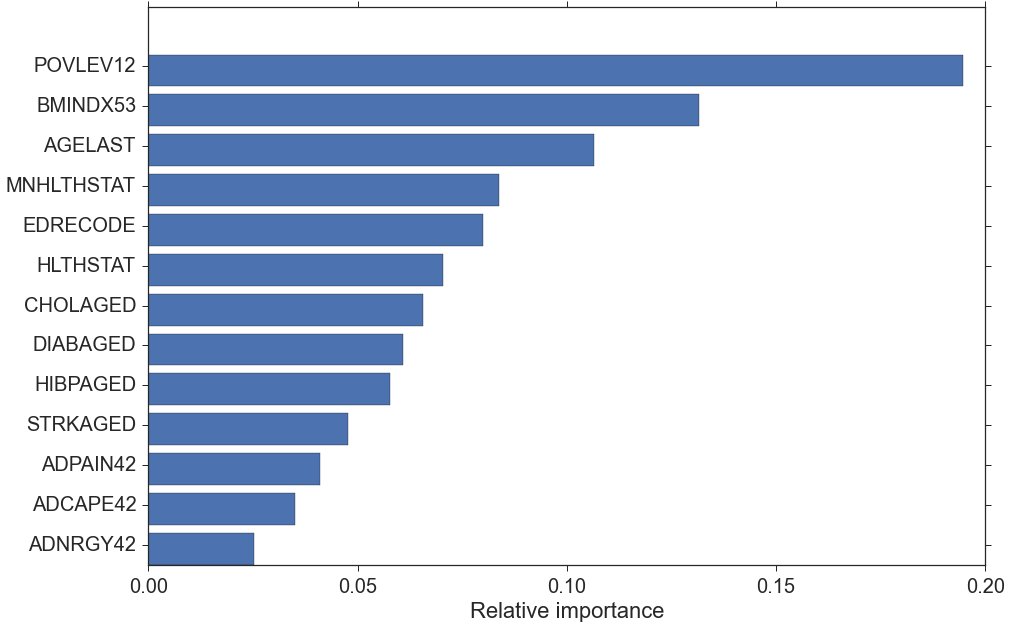

In [38]:
# plot feature importances (as a confirmation)
names = obX0.columns
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2)

fig = plt.figure(figsize=(15,10))
# sort importances
indices = np.argsort(obclf.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), obclf.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.5, np.array(names)[indices])
_ = plt.xlabel('Relative importance')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)


In [44]:
print indices
print np.array(names)[indices]
print obclf.feature_importances_[indices]

[12 10  8  4  3  6  9  1 11  5  7  2  0]
['ADNRGY42' 'ADCAPE42' 'ADPAIN42' 'STRKAGED' 'HIBPAGED' 'DIABAGED'
 'CHOLAGED' 'HLTHSTAT' 'EDRECODE' 'MNHLTHSTAT' 'AGELAST' 'BMINDX53'
 'POVLEV12']
[ 0.02520773  0.03494622  0.04111321  0.04765657  0.05784357  0.06078251
  0.0657352   0.07046923  0.07989462  0.08377015  0.10646701  0.13149703
  0.19461696]


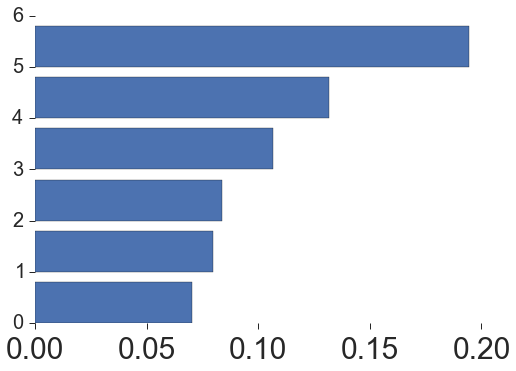

In [55]:
x = [0.07046923, 0.07989462, 0.08377015, 0.10646701, 0.13149703,  0.19461696]
y = ['Poverty Level','BMI','Age','Mental Health','Physical Health','Education Level']
y1 = np.arange(6)
plt.barh(y1, x)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y')

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

### ER Visits

In [137]:
# run model (using hyperparameters from optimization)
rng = np.random.RandomState(42)
erx_train, erx_test, ery_train, ery_test = train_test_split(erX2,erY, random_state=rng)
erclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
erclf.fit(erx_train,ery_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [138]:
# Calculate Mean Absolute Value
mae = mean_absolute_error(ery_test, erclf.predict(erx_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 1.0506


In [139]:
# Calculate r^2 score
er_pred = erclf.predict(erx_test)
err2 = r2_score(ery_test, er_pred) 
print err2

0.0101765636708


In [167]:

erclf.predict([234,3,25,0,0,3,0,30,0,0,3,16,3,0,1])

array([ 4.79553648])

### Inpatient Visits

In [140]:
# run model (using hyperparameters from optimization)
rng = np.random.RandomState(42)
inx_train, inx_test, iny_train, iny_test = train_test_split(inX2,inY, random_state=rng)
inclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
inclf.fit(inx_train,iny_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [141]:
# Calculate Mean Absolute Value
mae = mean_absolute_error(iny_test, inclf.predict(inx_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 0.9911


In [142]:
# Calculate r^2 score
in_pred = inclf.predict(inx_test)
inr2 = r2_score(iny_test, in_pred) 
print inr2

-0.00815191580129


### Home Health

In [143]:
# run model (using hyperparameters from optimization)
rng = np.random.RandomState(42)
hhx_train, hhx_test, hhy_train, hhy_test = train_test_split(hhX2,hhY, random_state=rng)
hhclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
hhclf.fit(hhx_train,hhy_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [144]:
# Calculate Mean Absolute Value
mae = mean_absolute_error(hhy_test, hhclf.predict(hhx_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 1.4510


In [145]:
# Calculate r^2 score
hh_pred = hhclf.predict(hhx_test)
hhr2 = r2_score(hhy_test, hh_pred) 
print hhr2

-0.332446972414


### RX

In [146]:
# run model (using hyperparameters from optimization)
rng = np.random.RandomState(42)
rxx_train, rxx_test, rxy_train, rxy_test = train_test_split(rxX2,rxY, random_state=rng)
rxclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
rxclf.fit(rxx_train,rxy_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [147]:
# Calculate Mean Absolute Value
mae = mean_absolute_error(rxy_test, rxclf.predict(rxx_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 1.4076


In [148]:
# Calculate r^2 score
rx_pred = rxclf.predict(rxx_test)
rxr2 = r2_score(rxy_test, rx_pred) 
print rxr2

0.333737970759


In [169]:

rxclf.predict([234,3,25,0,0,3,0,30,0,16,3,0,0,0,8,1])

array([ 8.3037315])

### Total

In [149]:
# run model (using hyperparameters from optimization)
rng = np.random.RandomState(42)
totx_train, totx_test, toty_train, toty_test = train_test_split(totX2,totY, random_state=rng)
totclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
totclf.fit(totx_train,toty_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [150]:
# Calculate Mean Absolute Value
mae = mean_absolute_error(toty_test, totclf.predict(totx_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 1.1260


In [151]:
# Calculate r^2 score
tot_pred = totclf.predict(totx_test)
totr2 = r2_score(toty_test, tot_pred) 
print totr2

0.292625983016


In [170]:

totclf.predict([3,3,30,234,16,0,0,0,0,0,25,0,0,0,3,8,2])
              

array([ 7.33971022])

### Model round 2 - ER Visits

In [97]:
columns = ['POVLEV12','HLTHSTAT',"BMINDX53","HIBPAGED",
            "DIABAGED",'AGELAST']
#'ACTDTY53'

# re-scale (normalize) continuous  & categorical (ordinal) data
nerX1 = preprocessing.StandardScaler().fit(erX0[columns])
nerX1 = nerX1.transform(erX0[columns])

#nerX2 = np.append(nerX1,erX0[['ACTDTY53']], axis=1)


In [98]:
# run model (using hyperparameters from optimization)
rng = np.random.RandomState(42)
nerx_train, nerx_test, nery_train, nery_test = train_test_split(nerX1,erY, random_state=rng)
nerclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
nerclf.fit(nerx_train,nery_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [99]:
# Calculate Mean Absolute Value
mae = mean_absolute_error(nery_test, nerclf.predict(nerx_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 1.0254


In [100]:
# Calculate r^2 score
ner_pred = nerclf.predict(nerx_test)
nerr2 = r2_score(nery_test, ner_pred) 
print nerr2

0.00897967858862


### Model round 2 - Inpatient Visits

In [107]:
columns = ['POVLEV12','HLTHSTAT',"BMINDX53",
            'AGELAST', "CHOLAGED"]
#'HIDEG','SEX','ANYLIM12', 'HISPCAT'
# re-scale (normalize) continuous  & categorical (ordinal) data
ninX1 = preprocessing.StandardScaler().fit(inX0[columns])
ninX1 = ninX1.transform(inX0[columns])

#ninX2 = np.append(inX1,inX0[['HIDEG','SEX','ANYLIM12', 'HISPCAT']], axis=1)

In [108]:
# run model (using hyperparameters from optimization)
rng = np.random.RandomState(42)
ninx_train, ninx_test, niny_train, niny_test = train_test_split(ninX1,inY, random_state=rng)
ninclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
ninclf.fit(ninx_train,niny_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [109]:
# Calculate Mean Absolute Value
mae = mean_absolute_error(niny_test, ninclf.predict(ninx_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 0.9783


In [110]:
# Calculate r^2 score
nin_pred = ninclf.predict(ninx_test)
ninr2 = r2_score(niny_test, nin_pred) 
print ninr2

-0.0505471628315


In [190]:
df.head()

,Unnamed: 0,Unnamed: 0.1,DUID_x,PID_x,DUPERSID,OBVTCH12,OBVEXP12,ERTTCH12,ERTEXP12,IPTTCH12,...,ADCAPE42,ADNRGY42,ADDOWN42,ADSOCA42,OBVEXPlog,ERTEXPlog,HHAEXPlog,IPTEXPlog,RXEXPlog,TOTEXPlog
0,0,0,20004,101,20004101,NaN,NaN,NaN,NaN,NaN,...,2,3,4,5,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,20004,102,20004102,NaN,NaN,NaN,NaN,NaN,...,3,3,4,5,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,20004,103,20004103,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4.317488
3,3,3,20005,101,20005101,1100,451,NaN,NaN,NaN,...,3,4,2,2,6.111467,NaN,NaN,NaN,5.68358,6.613384
4,4,4,20005,102,20005102,490,127,NaN,NaN,NaN,...,1,1,5,5,4.844187,NaN,NaN,NaN,NaN,4.844187


In [57]:
gbOBV=df.groupby('OBVGrp')
gbOBV = gbOBV.mean()

In [58]:
gbOBV = gbOBV.reset_index()
gbOBV.head()

,OBVGrp,Unnamed: 0,Unnamed: 0.1,DUID_x,PID_x,DUPERSID,OBVTCH12,OBVEXP12,ERTTCH12,ERTEXP12,...,ADCAPE42,ADNRGY42,ADDOWN42,ADSOCA42,OBVEXPlog,ERTEXPlog,HHAEXPlog,IPTEXPlog,RXEXPlog,TOTEXPlog
0,1,19325.785989,19325.785989,29676.685499,106.657541,29676792.156301,202.992793,62.152690,3683.847549,1019.584116,...,1.300733,1.305639,2.511684,2.627895,4.012755,6.126887,8.185841,8.788761,4.326847,5.622061
1,2,19382.324143,19382.324143,29703.514984,105.298250,29703620.282666,310.448813,147.566531,4222.902893,1129.697228,...,1.294174,1.360585,2.296572,2.407097,4.975378,6.268403,8.254311,8.856570,4.628635,6.186207
2,3,19214.148811,19214.148811,29621.872354,105.481344,29621977.835697,598.254200,289.816932,5230.478618,1319.631579,...,1.432686,1.565787,2.506437,2.615317,5.649625,6.331041,7.973145,8.935982,5.067506,6.835783
3,4,19493.749609,19493.749609,29760.796557,104.789515,29760901.346635,1010.319640,494.795383,4111.187342,1370.574413,...,1.586463,1.723005,2.672926,2.765649,6.197415,6.391121,8.056025,8.988645,5.426405,7.318940
4,5,20205.014947,20205.014947,30130.125267,104.368327,30130229.635231,1677.325267,777.091103,4959.588710,1459.610998,...,1.804982,1.995374,2.962278,3.054804,6.644615,6.497429,8.223572,8.885508,5.768670,7.774343


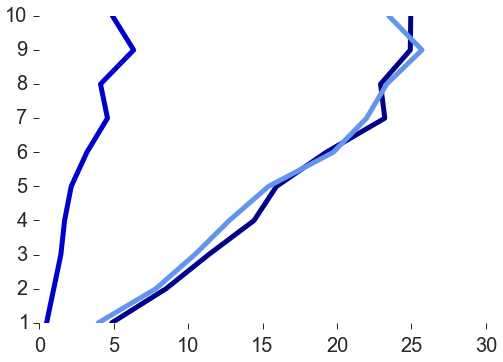

In [59]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2)
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
#plt.plot(gbOBV.OBVGrp,gbOBV.AGELAST,linewidth=5.0,color='mediumseagreen')
plt.plot(gbOBV.HIBPAGED,gbOBV.OBVGrp,linewidth=5.0,color='darkblue')
plt.plot(gbOBV.STRKAGED,gbOBV.OBVGrp,linewidth=5.0,color='mediumblue')
plt.plot(gbOBV.CHOLAGED,gbOBV.OBVGrp,linewidth=5.0,color='cornflowerblue')


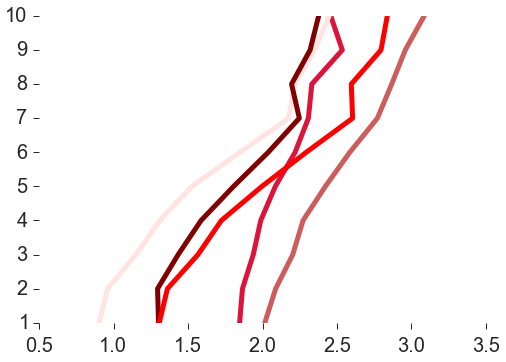

In [60]:
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
    
plt.plot(gbOBV.HLTHSTAT,gbOBV.OBVGrp,linewidth=5.0,color='indianred')
plt.plot(gbOBV.MNHLTHSTAT,gbOBV.OBVGrp,linewidth=5.0,color='crimson')
plt.plot(gbOBV.ADPAIN42,gbOBV.OBVGrp,linewidth=5.0,color='mistyrose')
plt.plot(gbOBV.ADCAPE42,gbOBV.OBVGrp,linewidth=5.0,color='maroon')
plt.plot(gbOBV.OBVGrp,gbOBV.ADNRGY42,linewidth=5.0,color='red')

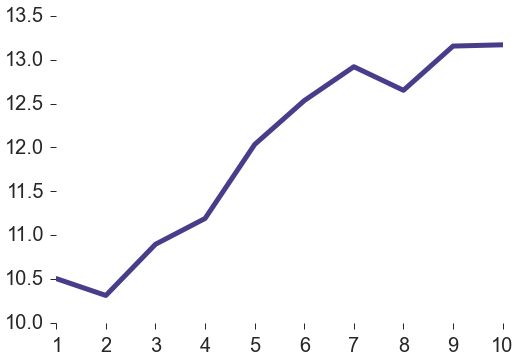

In [68]:

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
fig = plt.figure()
 # Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
ax = plt.subplot(111)
ax.set_ylim(10,13.5)  

ax.plot(gbOBV.OBVGrp, gbOBV.EDRECODE, linewidth=5.0,color='darkslateblue')




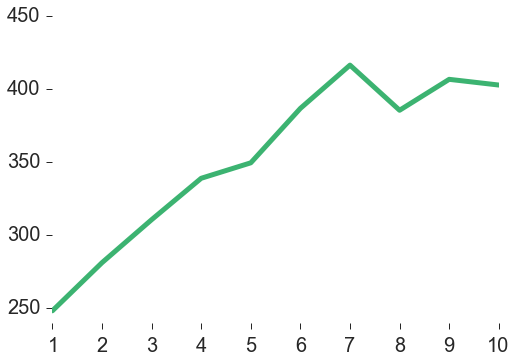

In [69]:
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
fig = plt.figure()
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
ax = plt.subplot(111)
ax.set_ylim(240, 450)

ax.plot(gbOBV.OBVGrp, gbOBV.POVLEV12, linewidth=5.0,color='mediumseagreen')



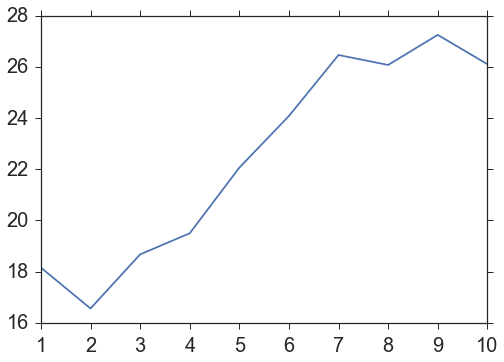

In [202]:
plt.plot(gbOBV.OBVGrp,gbOBV.BMINDX53)

In [293]:
df.STRKAGED.unique()

array([ 0, 28, 30, 67, 64, 46, 55, 50, 44, 60, 34, 21, 82, 65, 68, 33, 70,
       48, 57, 85, 26, 45, 27, 58, 49, 51, 80, 42, 61, 77, 35, 71, 53, 22,
       23, 31, 66, 75, 84, 78, 47, 73, 56, 52, 62, 39,  7, 36, 74, 63, 20,
       54, 24, 43, 76, 59, 69, 41, 37, 32, 25, 40, 72, 83, 29, 38, 81, 79,
       16, 19, 18, 17,  8, 12, 14, 13,  3,  6])

In [294]:
plt.plot(gbOBV.OBVGrp,gbOBV.AGELAST)